Predicting the relationship between the H-index and total citation in the given dataset so that it will be easy for the authors to know the citations.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/data.xls")
data.head()


,Unnamed: 0,Name,Affilation,H-index,Citations 2020,Total_citation,H-index_since_2016,Citation_since_2016,HomePage,Area of Research,Google_Scholar
0,0,U Rajendra Acharya (SCI Highly Cited Researche...,"Ngee Ann, Singapore University of Social Scie...",108,8767,46452,97,36679,https://www.sgpc.gov.sg/sgpcmedia/media_releas...,Artificial Intelligence/Medical Informatics,https://scholar.google.com.sg/citations?user=8...
1,1,IAN F. AKYILDIZ,"Truva Inc. , USA",131,6707,131149,86,45077,https://en.wikipedia.org/wiki/Ian_F._Akyildiz#...,Wireless Communication/5G/6G Wireless Systems/...,https://scholar.google.com/citations?user=rAGw...
2,2,Ibrahim Aljarah,"Associate Professor, University of Jordan",42,2260,6956,42,6849,http://eacademic.ju.edu.jo/i.aljarah,Artificial intelligence/Data Security/Data Sc...,https://scholar.google.com/citations?user=moOT...
3,3,Jeffrey Andrews,"Cockrell Family Endowed Chair in Engineering, ...",104,4659,64221,79,34684,https://www.genealogy.math.ndsu.nodak.edu/id.p...,Wireless Communications/Communication Theory/M...,https://scholar.google.com/citations?user=Hr9G...
4,4,Bennis Mehdi,"Full Professor, IEEE Fellow, Head of ICON, Uni...",64,5562,21992,61,20412,https://sites.google.com/view/dr-mehdi-bennis/...,B5G/6G/machine learning/semantic communication,https://scholar.google.com/citations?user=RW4s...


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           104 non-null    int64 
 1   Name                 104 non-null    object
 2   Affilation           104 non-null    object
 3   H-index              104 non-null    int64 
 4   Citations 2020       104 non-null    int64 
 5   Total_citation       104 non-null    int64 
 6   H-index_since_2016   104 non-null    int64 
 7   Citation_since_2016  104 non-null    int64 
 8   HomePage             104 non-null    object
 9   Area of Research     102 non-null    object
 10  Google_Scholar       104 non-null    object
dtypes: int64(6), object(5)
memory usage: 9.1+ KB


In [ ]:
data.columns

Index(['Unnamed: 0', 'Name', 'Affilation', 'H-index', 'Citations 2020',
       'Total_citation', 'H-index_since_2016', 'Citation_since_2016',
       'HomePage', 'Area of Research', 'Google_Scholar'],
      dtype='object')

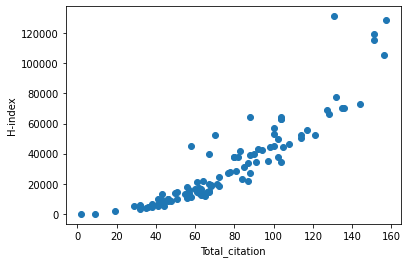

In [ ]:

h = data["H-index"].to_numpy()
cite = data["Total_citation"].to_numpy()
# scatter plot
plt.scatter(h,cite)
plt.ylabel("H-index")
plt.xlabel("Total_citation")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
h_train, h_test, cite_train, cite_test = train_test_split(h,cite)

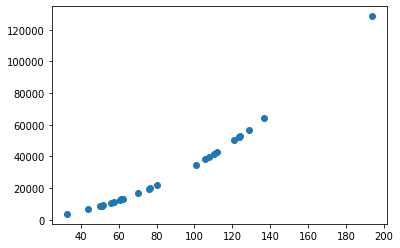

In [ ]:
from scipy.sparse.linalg.isolve.lsqr import sqrt
h_pred = []
length = len(cite_test)
i=0
while i < length:
  y = cite_test[i]
  h_pred.append(0.54*sqrt(y))
  i+=1
plot = plt.scatter(h_pred,cite_test)


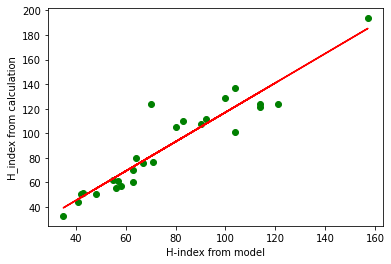

In [ ]:
plt.plot(h_test,h_pred, 'o', color = 'green')
m, b = np.polyfit(h_test,h_pred, 1)
plt.plot(h_test, m*h_test+b, color='red')
plt.xlabel("H-index from model")
plt.ylabel("H_index from calculation")
plt.show()

In [ ]:
print('mean absolute error =', sm.mean_absolute_error(h_pred,h_test))
print('mean square error =', sm.mean_squared_error(h_pred,h_test))
print('root mean square error =', np.sqrt(sm.mean_squared_error(h_pred,h_test)))
print('mean absolute percentage error =', sm.mean_absolute_percentage_error(h_pred,h_test))
print("Explain variance score =", sm.explained_variance_score(h_pred,h_test))
print('R^2 score =', sm.r2_score(h_pred,h_test))

mean absolute error = 13.160447562243974
mean square error = 347.25349468482244
root mean square error = 18.634738921831516
mean absolute percentage error = 0.1292984860747344
Explain variance score = 0.861288057566314
R^2 score = 0.7483170124490941
